In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df_train = pd.read_csv("digitstrain.csv") 

In [3]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df_train.drop(labels = ["label"],axis = 1)
y = df_train['label']

In [5]:
X = X.to_numpy()

In [6]:
X.shape

(42000, 784)

In [7]:
y = y.to_numpy()

In [8]:
y.shape

(42000,)

In [9]:
y = y.reshape(-1, 1)

In [10]:
y.shape

(42000, 1)

In [11]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

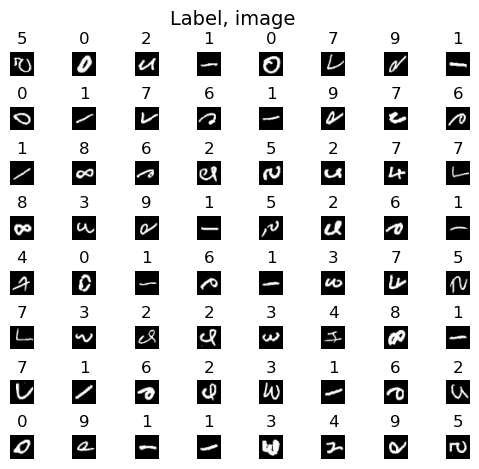

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((28,28)).T

    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [13]:
import keras 
import tensorflow as tf

In [14]:
X = tf.keras.utils.normalize(X , axis = 1)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='relu'), 
    keras.layers.Dense(15, activation='relu'), 
    keras.layers.Dense(10, activation='softmax') 
])
 
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [16]:
model.fit(X, y, epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6340 - loss: 1.1951
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8946 - loss: 0.3689
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9103 - loss: 0.3082
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9251 - loss: 0.2616
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9337 - loss: 0.2325
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9379 - loss: 0.2078
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9430 - loss: 0.1941
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9507 - loss: 0.1724
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9533 - loss: 0.1600
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9562 - loss: 0.1490


In [17]:
image = X[1015]

prediction = model.predict(image.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
 predicting a Two: 
[[1.3773685e-04 2.4006476e-06 5.8321084e-04 1.5952533e-02 1.6110032e-05
  2.3750632e-01 4.0553241e-06 2.4007254e-06 7.4432540e-01 1.4698629e-03]]
 Largest Prediction index: 8


In [18]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[0.0877976  0.08778572 0.08783673 0.08919714 0.08778693 0.11131931
  0.08778587 0.08778572 0.18479034 0.08791464]]
Total of predictions: 1.000


In [19]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 8


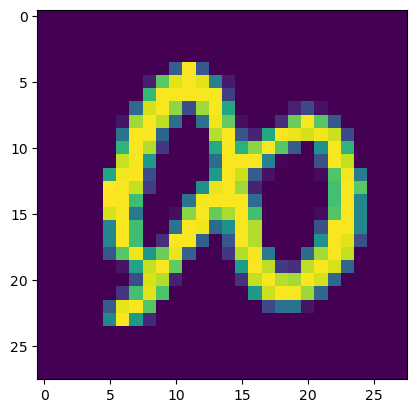

In [20]:
plt.imshow(image.reshape((28,28)).T)